In [1]:
import os, astropy
import numpy as np
import lightkurve as lk
import pbjam as pb
import pandas as pd

from astropy.time import Time
from astropy.units import Quantity, Unit

%matplotlib inline

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
print(f'Lightkurve version {lk.__version__}')
print(f'PBjam version {pb.__version__}')

Lightkurve version 2.4.0
PBjam version 1.0.1


Data downloaded from KASOC.

In [3]:
path = os.path.expanduser("~/OneDrive/Data/alexlyttle/thesis/16cyga")

In [12]:
data = pd.read_table(
    os.path.join(path, "kplr012069424_kasoc-ts_slc_v1.dat"),
    names=["time", "flux", "flux_err"],
    delimiter="\s+",
    comment="#",
    na_values="-Inf",
)
data.head()

,time,flux,flux_err
0,55372.439394,300.439841,489.763831
1,55372.440075,783.228493,490.098386
2,55372.440756,-356.657086,490.165298
3,55372.441438,182.191963,490.193974
4,55372.442119,-330.723326,490.209905


In [13]:
data = data.dropna()

,time,flux,flux_err
0,55372.439394,300.439841,489.763831
1,55372.440075,783.228493,490.098386
2,55372.440756,-356.657086,490.165298
3,55372.441438,182.191963,490.193974
4,55372.442119,-330.723326,490.209905
...,...,...,...
1428895,56424.008182,NaN,NaN
1428896,56424.008863,NaN,NaN
1428897,56424.009544,NaN,NaN
1428898,56424.010226,269.418331,62.919269


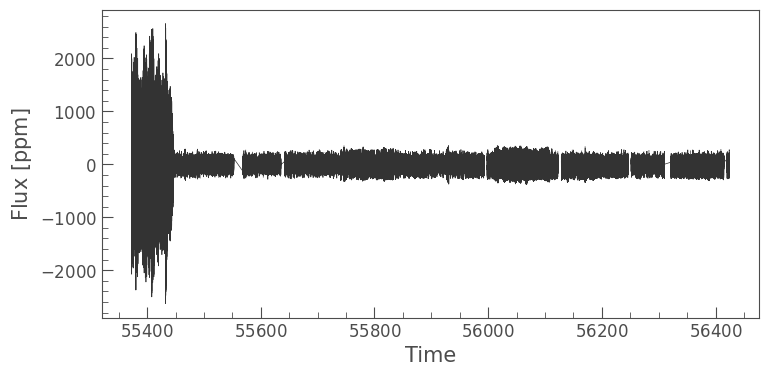

In [34]:
lc = lk.LightCurve(
    time=Time(data.time, scale="tcb", format="mjd"),
    flux=Quantity(data.flux, unit=Unit("ppm")),
    flux_err=Quantity(data.flux_err, unit=Unit("ppm"))
)
lc.plot();

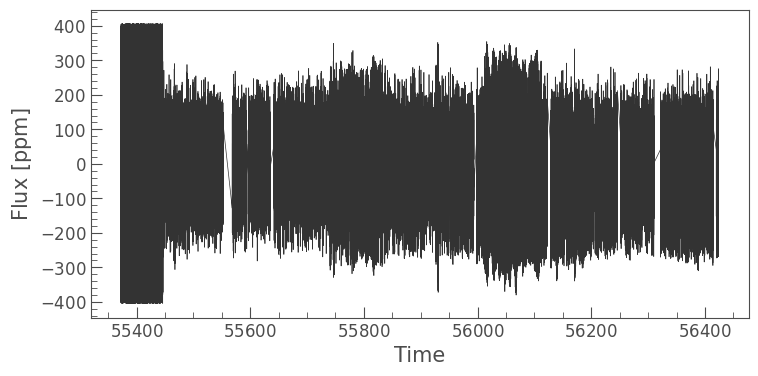

In [35]:
lc = lc.remove_outliers(5)
lc.plot();

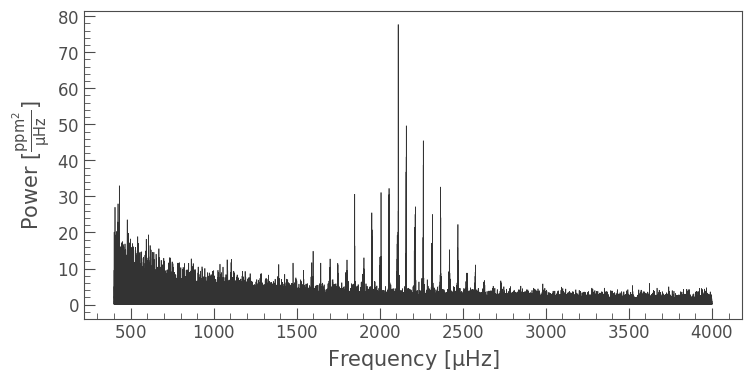

In [50]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=400., maximum_frequency=4000.)
pg.plot();

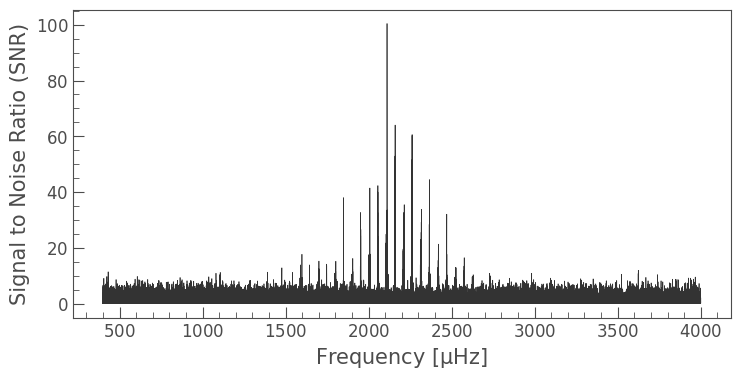

In [51]:
pg = pg.flatten()
pg.plot();

In [52]:
seis = pg.to_seismology()
seis.estimate_numax()
seis.estimate_deltanu()

deltanu: 103.57 uHz (method: ACF2D)

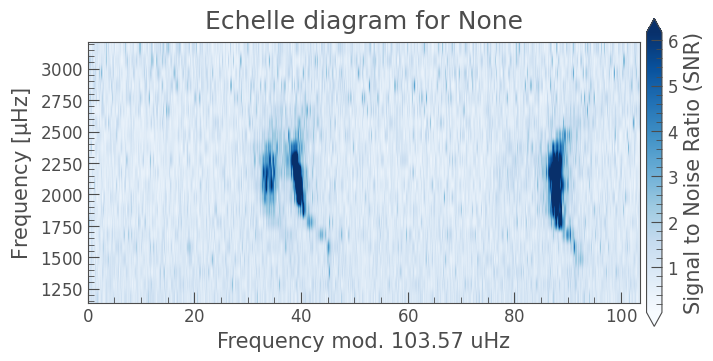

In [53]:
seis.plot_echelle(smooth_filter_width=0.00);